Hola **Edgar**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
dt_megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
dt_megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
dt_megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
dt_megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
dt_megaline_users = pd.read_csv('/datasets/megaline_users.csv')

#print(dt_megaline_calls.head()) # check if separations are correct
#print('/////////////////')
#print(dt_megaline_internet.head())
#print('/////////////////')
#print(dt_megaline_messages.head())
#print('/////////////////')
#print(dt_megaline_plans.head())
#print('/////////////////')
#print(dt_megaline_users.head())


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo realizando la importación de librerías y carga de datos en celdas separadas, esto ayuda a que la lectura y seguimiento del notebook sea más amigable
</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
dt_megaline_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
dt_megaline_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

1. Las columnas respetan las cantidades del plan correctamente.
2. Se hará cambio de nombre a alguna columna para respetar el diccionario de datos dado al inicio. `usd_monthly_pay` por `usd_monthly_fee`

In [5]:
dt_megaline_plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)
#dt_megaline_plans.head() #mostrar el cambio realizado

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#calcular el total de usuarios de cada plan desde el data frame dt_megaline_users y agregar directamente en dt_megaline_plans en una columna llamada total_users
conteo_usuarios = dt_megaline_users['plan'].value_counts()

#Mapear los conteos a dt_megaline_plans
dt_megaline_plans['total_users'] = dt_megaline_plans['plan_name'].map(conteo_usuarios).fillna(0).astype(int)
print(dt_megaline_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_fee  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   total_users  
0          339  
1          161  


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para estandarizar tus datos aquí deberías transformar los MB a GB dividiendo para 1024, así quedan todos los datos en una misma unidad de medida
</div>

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

dt_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

dt_megaline_users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaN
291,1291,Angeles,Mejia,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-01-29,surf,NaN
292,1292,Cassey,French,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,surf,NaN
257,1257,Gabriel,O'donnell,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaN
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,NaN
120,1120,Abraham,Mcconnell,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-03,surf,NaN
318,1318,Huey,Walsh,54,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-29,surf,NaN
391,1391,Errol,Cooke,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-11,ultimate,NaN
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
1.   `reg_date` y `churn_date` se cambiaran a tipo date para poder utilizar mejor estos datos.
2.   Los valores nulos de `churn_date` se dejaran como **NaT** lo que nos ayuda a recordar que aun se estaba usando cuando se hizo la extracción

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
#cambio de tipos de datos
dt_megaline_users['reg_date'] = pd.to_datetime(dt_megaline_users['reg_date']).astype("datetime64[s]")
dt_megaline_users['churn_date'] = pd.to_datetime(dt_megaline_users['churn_date'], errors='coerce').astype("datetime64[s]")



#revisar cambios
print(dt_megaline_users.info())
print(dt_megaline_users.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
     user_id first_name last_name  age  \
293     1293      Lanny     Nolan   23   
251     1251     Tifany     Mcgee   45   
425     1425   Latrisha    Larsen   19   
497     1497      Donte   Barrera   49   
411     1411        Man   Fleming   64   
183     1183   Jermaine  Gallegos   71   
134     1134    Shannon   Nichols   71   
342  

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
#crear columna days_in_use
dt_megaline_users['days_in_use'] = dt_megaline_users['churn_date'] - dt_megaline_users['reg_date']
dt_megaline_users['days_in_use'] = dt_megaline_users['days_in_use'].dt.days
dt_megaline_users['days_in_use'] = dt_megaline_users['days_in_use'].fillna('In use')
#revisar cambios
dt_megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_in_use
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,In use
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,In use
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,In use
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,In use
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,In use


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

dt_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
dt_megaline_calls.sample(15)


,id,user_id,call_date,duration
117940,1412_224,1412,2018-08-29,12.82
36430,1138_389,1138,2018-11-22,0.00
47922,1173_244,1173,2018-10-27,1.00
76973,1277_49,1277,2018-10-02,0.00
29558,1112_64,1112,2018-10-30,8.83
97343,1347_169,1347,2018-10-28,10.57
82875,1299_533,1299,2018-06-22,8.19
40040,1147_876,1147,2018-09-05,8.93
71937,1255_990,1255,2018-11-04,10.49
12900,1056_43,1056,2018-09-26,7.14


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
1.   Se cambiará `call_date` al tipo de dato **date**.
2.   Se redondearán las duraciones de las llamadas al minuto más próximo, respetando las descripciones de las tarifas dadas.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [1]:
dt_megaline_calls['call_date'] = pd.to_datetime(dt_megaline_calls['call_date']).astype("datetime64[s]")
#print(dt_megaline_calls['duration'])
dt_megaline_calls['duration'] = np.ceil(dt_megaline_calls['duration']).astype(int) #redondeo hacia arriba, al entero mas cercano

#revision
#print(dt_megaline_calls['duration'])
print(dt_megaline_calls.info())

NameError: name 'pd' is not defined

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para seguir los lineamientos de la empresa, deberías aplicar un redondeo hacia arriba de la columna `duration` ya que se cobra cómo minuto entero cada fracción
</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
1. Agregar el tipo de plan por usuario.

In [14]:
#agregar una columna de nombre plan que anexe el tipo de plan por usuario del data frame dt_megaline_users
dt_megaline_calls = dt_megaline_calls.merge(dt_megaline_users[['user_id', 'plan']], on='user_id', how='left')
dt_megaline_calls.head()

,id,user_id,call_date,duration,plan
0,1000_93,1000,2018-12-27,9,ultimate
1,1000_145,1000,2018-12-27,14,ultimate
2,1000_247,1000,2018-12-27,15,ultimate
3,1000_309,1000,2018-12-28,6,ultimate
4,1000_380,1000,2018-12-30,5,ultimate


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
dt_megaline_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes

dt_megaline_messages.sample(15)

,id,user_id,message_date
69178,1448_443,1448,2018-11-01
38821,1254_489,1254,2018-12-27
42628,1280_129,1280,2018-07-11
47004,1320_248,1320,2018-05-14
4324,1043_513,1043,2018-09-19
44182,1293_1107,1293,2018-12-25
61098,1384_161,1384,2018-11-20
67580,1438_146,1438,2018-10-22
38473,1253_7,1253,2018-11-05
36938,1247_102,1247,2018-12-17


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
1.   Se cambiará el tipo de dato de `message_date` a tipo date.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
dt_megaline_messages['message_date'] = pd.to_datetime(dt_megaline_messages['message_date']).astype("datetime64[s]")
dt_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
dt_megaline_messages = dt_megaline_messages.merge(dt_megaline_users[['user_id', 'plan']], on='user_id', how='left')
dt_megaline_messages.head()

,id,user_id,message_date,plan
0,1000_125,1000,2018-12-27,ultimate
1,1000_160,1000,2018-12-31,ultimate
2,1000_223,1000,2018-12-31,ultimate
3,1000_251,1000,2018-12-27,ultimate
4,1000_255,1000,2018-12-26,ultimate


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
dt_megaline_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
dt_megaline_internet.sample(15)

,id,user_id,session_date,mb_used
36737,1165_117,1165,2018-10-28,336.88
85906,1400_34,1400,2018-06-07,805.04
58206,1263_10,1263,2018-12-29,567.99
34863,1156_460,1156,2018-07-21,53.20
85639,1399_250,1399,2018-09-21,397.46
14875,1067_246,1067,2018-11-27,565.30
34845,1156_442,1156,2018-07-09,0.00
32967,1148_115,1148,2018-11-11,212.93
71853,1335_92,1335,2018-08-01,770.54
75784,1357_34,1357,2018-09-01,0.00


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
1.   Cambiar el tipo de dato para `session_date` a date para poder calcular mejor el total de mb usados en el mes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
dt_megaline_internet['session_date'] = pd.to_datetime(dt_megaline_internet['session_date']).astype("datetime64[s]")
dt_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
1. Agregar el tipo de plan de cada entrada


In [22]:
dt_megaline_internet = dt_megaline_internet.merge(dt_megaline_users[['user_id', 'plan']], on='user_id', how='left')

In [23]:
dt_megaline_internet.sample(15)

,id,user_id,session_date,mb_used,plan
50237,1223_449,1223,2018-12-23,300.04,surf
34185,1155_229,1155,2018-03-20,51.18,ultimate
94938,1443_8,1443,2018-12-11,0.00,surf
60666,1276_150,1276,2018-11-22,407.00,surf
8571,1045_72,1045,2018-10-17,863.96,surf
101481,1483_305,1483,2018-05-20,395.52,surf
69508,1324_226,1324,2018-06-01,577.99,surf
49520,1222_19,1222,2018-10-15,99.85,surf
82709,1386_24,1386,2018-12-16,682.08,surf
73567,1346_148,1346,2018-12-07,458.15,ultimate


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print('Surf\n1. Pago mensual: $20.\n2. 500 minutos al mes, 50 SMS y 15 GB de datos.\n3. Si se exceden los límites del paquete:\n    - 1 minuto: 3 centavos.\n    - 1 SMS: 3 centavos.\n    - 1 GB de datos: $10.')
print('////////////')
print('Ultimate\n\nPago mensual: $70.\n3000 minutos al mes, 1000 SMS y 30 GB de datos.\nSi se exceden los límites del paquete:\n1 minuto: 1 centavo.\n1 SMS: 1 centavo.\n1 GB de datos: $7.')



Surf
1. Pago mensual: $20.
2. 500 minutos al mes, 50 SMS y 15 GB de datos.
3. Si se exceden los límites del paquete:
    - 1 minuto: 3 centavos.
    - 1 SMS: 3 centavos.
    - 1 GB de datos: $10.
////////////
Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando quieras escribir algo siempre utiliza celdas markdown, además, aquí deberías usar el dataset donde están los datos de las tarifas más no escribir manualmente
</div>

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La agregación de los datos no debe ser con pivot_tabl, debes utilizar `groupby`, así evitas sobre utilizar recursos computacionales y escribir tanto código
</div>

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_by_month = pd.DataFrame(columns=['user_id', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'total_calls'])
calls_by_month['user_id'] = dt_megaline_users['user_id'] #rellena la columna 'user_id'
month_columns = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Process each month and populate DataFrame A
for month_num, month_col in enumerate(month_columns, start=1):
    # filter current month
    monthly_calls = dt_megaline_calls[dt_megaline_calls['call_date'].dt.month == month_num]

    # count unique call IDs
    monthly_counts = monthly_calls.groupby('user_id')['id'].count().rename(month_col)

    calls_by_month[month_col] = calls_by_month['user_id'].map(monthly_counts).fillna(0).astype(int)

calls_by_month['total_calls'] = calls_by_month[month_columns].sum(axis=1)

print(calls_by_month)


     user_id  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec  \
0       1000    0    0    0    0    0    0    0    0    0    0    0   16   
1       1001    0    0    0    0    0    0    0   27   49   65   64   56   
2       1002    0    0    0    0    0    0    0    0    0   11   55   47   
3       1003    0    0    0    0    0    0    0    0    0    0    0  149   
4       1004    0    0    0    0   21   44   49   49   42   61   54   50   
..       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495     1495    0    0    0    0    0    0    0    0   52   75   61   65   
496     1496    0    0    0    0    0    0    0   18   52   46   39   40   
497     1497    0    0    0    0    0    0    0    0    0    0    0   54   
498     1498    0   37   37   47   35   37   43   44   45   46   41   39   
499     1499    0    0    0    0    0    0    0    0   41   53   45   65   

     total_calls  
0             16  
1            261  
2            113  
3          

In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



In [27]:
#crear dataframe con las columnas necesarias, una para cada mes, una para cada usuario y una para el total.
mins_by_month = pd.DataFrame(columns=['user_id', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'total_mins'])
mins_by_month['user_id'] = dt_megaline_users['user_id'] #rellena la columna 'user_id'
# calculate total duration per user per month
monthly_totals = (
    dt_megaline_calls
    .assign(month=dt_megaline_calls['call_date'].dt.month)
    .groupby(['user_id', 'month'])['duration']
    .sum()
    .reset_index()
)
#print(monthly_totals)
# Pivot table
pivoted = monthly_totals.pivot(
    index='user_id',
    columns='month',
    values='duration'
).fillna(0)

#print(pivoted)
# Rename columns to months
month_map = {
    1: "jan",
    2: "feb",
    3: "mar",
    4: "apr",
    5: "may",
    6: "jun",
    7: "jul",
    8: "aug",
    9: "sep",
    10: "oct",
    11: "nov",
    12: "dec"
} # para todos los otros dataframes
pivoted = pivoted.rename(columns=month_map)

#print(pivoted)
# Update calls_by_month
mins_by_month = mins_by_month.set_index('user_id')
mins_by_month.update(pivoted)
mins_by_month = mins_by_month.reset_index()

# Calculate total by client
month_cols = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
mins_by_month['total_mins'] = mins_by_month[month_cols].sum(axis=1)


#revisar resultados
print(mins_by_month)

     user_id  jan    feb    mar    apr    may    jun    jul    aug    sep  \
0       1000  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       1001  0.0    0.0    0.0    0.0    0.0    0.0    0.0  182.0  315.0   
2       1002  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       1003  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       1004  0.0    0.0    0.0    0.0  193.0  275.0  381.0  354.0  301.0   
..       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
495     1495  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  302.0   
496     1496  0.0    0.0    0.0    0.0    0.0    0.0    0.0  122.0  414.0   
497     1497  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
498     1498  0.0  244.0  266.0  365.0  288.0  238.0  321.0  266.0  363.0   
499     1499  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  346.0   

       oct    nov     dec  total_mins  
0      0.0    0.0   124.0       124

In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



In [29]:
messages_by_month = pd.DataFrame(columns=['user_id', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'total_messages'])
messages_by_month['user_id'] = dt_megaline_users['user_id'] #rellena la columna 'user_id'


# Calculate messages per user per month
monthly_counts = (
    dt_megaline_messages
    .assign(month=dt_megaline_messages['message_date'].dt.month)
    .groupby(['user_id', 'month'])
    .size()
    .reset_index(name='count')
)

# Pivot and reshape
pivoted = monthly_counts.pivot(
    index='user_id',
    columns='month',
    values='count'
)
pivoted = pivoted.reindex(columns=range(1, 13)).fillna(0)

# Rename columns to month abbreviations
pivoted = pivoted.rename(columns=month_map)

# Update messages_by_month
messages_by_month = messages_by_month.set_index('user_id')
messages_by_month.update(pivoted)
messages_by_month = messages_by_month.fillna(0).reset_index()

# calculate total_messages

messages_by_month['total_messages'] = messages_by_month[month_cols].sum(axis=1)
print(messages_by_month)

     user_id  jan  feb  mar  apr  may   jun   jul   aug   sep   oct   nov  \
0       1000  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       1001  0.0  0.0  0.0  0.0  0.0   0.0   0.0  30.0  44.0  53.0  36.0   
2       1002  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0  15.0  32.0   
3       1003  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       1004  0.0  0.0  0.0  0.0  7.0  18.0  26.0  25.0  21.0  24.0  25.0   
..       ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
495     1495  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   
496     1496  0.0  0.0  0.0  0.0  0.0   0.0   0.0   2.0  21.0  18.0  13.0   
497     1497  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   
498     1498  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   
499     1499  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      dec  total_messages  
0    11.0            11.0  
1    44.0          

In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



In [31]:
mb_by_month = pd.DataFrame(columns=['user_id', 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
                                    'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'total_mb', 'total_gb'])
mb_by_month['user_id'] = dt_megaline_users['user_id']

# calculate mb used per user per month
monthly_mb = (
    dt_megaline_internet
    .assign(month=dt_megaline_internet['session_date'].dt.month)  # Extract month (1-12)
    .groupby(['user_id', 'month'])['mb_used'].sum()  # Sum MB per user/month
    .reset_index(name='mb_used')
)

# Pivot
pivoted = monthly_mb.pivot(
    index='user_id',
    columns='month',
    values='mb_used'
)

pivoted = pivoted.reindex(columns=range(1, 13), fill_value=0)

# rename columns
pivoted = pivoted.rename(columns=month_map)

# update mb_by_month
mb_by_month = mb_by_month.set_index('user_id')
mb_by_month.update(pivoted)
mb_by_month = mb_by_month.reset_index()
mb_by_month = mb_by_month.fillna(0) #cambiar a 0

# calculate total_mb and total_gb

mb_by_month['total_mb'] = mb_by_month[month_cols].sum(axis=1)
mb_by_month['total_gb'] = np.ceil(mb_by_month['total_mb'] / 1024).astype(int)  # conversion al siguiente GB

print(mb_by_month)

     user_id  jan       feb       mar       apr       may       jun       jul  \
0       1000  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1       1001  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
2       1002  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
3       1003  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
4       1004  0.0      0.00      0.00      0.00   6547.21  20672.82  24516.62   
..       ...  ...       ...       ...       ...       ...       ...       ...   
495     1495  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
496     1496  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
497     1497  0.0      0.00      0.00      0.00      0.00      0.00      0.00   
498     1498  0.0  19822.04  19744.34  19878.86  22462.17  14807.18  24834.37   
499     1499  0.0      0.00      0.00      0.00      0.00      0.00      0.00   

          aug       sep    

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month



In [33]:
# Reshape de df antes de merge
def reshape_long(df, value_name):

    month_columns = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                     'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    return df.melt(
        id_vars='user_id',
        value_vars=month_columns,
        var_name='month',
        value_name=value_name
    )



long_calls_by_month = reshape_long(calls_by_month, 'calls')
long_mins_by_month = reshape_long(mins_by_month, 'minutes')
long_messages_by_month = reshape_long(messages_by_month, 'messages')
long_mb_by_month = reshape_long(mb_by_month, 'gb')

#print(long_calls_by_month.head(15)) # revision
#print(long_mins_by_month.head(15))
#print(long_messages_by_month.head(15))
print(long_mb_by_month)

      user_id month        gb
0        1000   jan      0.00
1        1001   jan      0.00
2        1002   jan      0.00
3        1003   jan      0.00
4        1004   jan      0.00
...       ...   ...       ...
5995     1495   dec  24097.40
5996     1496   dec  16438.99
5997     1497   dec  11106.55
5998     1498   dec  23137.69
5999     1499   dec  22059.21

[6000 rows x 3 columns]


In [34]:
merged_data_complete = long_calls_by_month.merge(
    long_mins_by_month, on=['user_id', 'month'], how='outer'
).merge(
    long_messages_by_month, on=['user_id', 'month'], how='outer'
).merge(
    long_mb_by_month, on=['user_id', 'month'], how='outer'
)

# Calculate GB
merged_data_complete['gb'] = np.ceil(merged_data_complete['gb'] / 1024).astype(int)
# Reorder df
merged_data_complete['month'] = pd.Categorical(
        merged_data_complete['month'],
        categories=month_cols,
        ordered=True
)
# reset Index
merged_data_complete = merged_data_complete.sort_values(by=['user_id', 'month'])
merged_data_complete = merged_data_complete.reset_index(drop=True)
print(merged_data_complete)

      user_id month  calls minutes  messages  gb
0        1000   jan      0     0.0       0.0   0
1        1000   feb      0     0.0       0.0   0
2        1000   mar      0     0.0       0.0   0
3        1000   apr      0     0.0       0.0   0
4        1000   may      0     0.0       0.0   0
...       ...   ...    ...     ...       ...  ..
5995     1499   aug      0     0.0       0.0   0
5996     1499   sep     41   346.0       0.0  13
5997     1499   oct     53   385.0       0.0  20
5998     1499   nov     45   308.0       0.0  17
5999     1499   dec     65   496.0       0.0  22

[6000 rows x 6 columns]


In [35]:
# Añade la información de la tarifa

# Extraer el usuario con su tarifa
df_plans_users = dt_megaline_users[['user_id', 'plan']]

# Merge
merged_data_complete = merged_data_complete.merge(
    df_plans_users,
    on='user_id',
    how='left'
)


print(merged_data_complete) # Revisar

# Agrega tariff values
plan_details = pd.DataFrame({ # datafram de valores para merge
    'plan': ['surf', 'ultimate'],
    'monthly_fee': [20, 70],  # Base monthly fee
    'included_minutes': [500, 3000],  # Monthly minute
    'included_messages': [50, 1000],  # Monthly message
    'included_gb': [15, 30],  # Monthly data
    'minute_exceed_rate': [0.03, 0.01],  # Cost extra minute
    'sms_exceed_rate': [0.03, 0.01],  # Cost extra SMS
    'gb_exceed_rate': [10, 7]  # Costo extra GB
})
merged_data_complete = pd.merge(merged_data_complete, plan_details, on='plan', how='left')
#print(merged_data_complete.info())

      user_id month  calls minutes  messages  gb      plan
0        1000   jan      0     0.0       0.0   0  ultimate
1        1000   feb      0     0.0       0.0   0  ultimate
2        1000   mar      0     0.0       0.0   0  ultimate
3        1000   apr      0     0.0       0.0   0  ultimate
4        1000   may      0     0.0       0.0   0  ultimate
...       ...   ...    ...     ...       ...  ..       ...
5995     1499   aug      0     0.0       0.0   0      surf
5996     1499   sep     41   346.0       0.0  13      surf
5997     1499   oct     53   385.0       0.0  20      surf
5998     1499   nov     45   308.0       0.0  17      surf
5999     1499   dec     65   496.0       0.0  22      surf

[6000 rows x 7 columns]


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [36]:
# Calcula el ingreso mensual para cada usuario
# Minutes
merged_data_complete['minute_exceed_cost'] = (
    (merged_data_complete['minutes'] - merged_data_complete['included_minutes'])
    .clip(lower=0)
    * merged_data_complete['minute_exceed_rate']
)
# messages (sms)
merged_data_complete['sms_exceed_cost'] = (
    (merged_data_complete['messages'] - merged_data_complete['included_messages'])
    .clip(lower=0)
    * merged_data_complete['sms_exceed_rate']
)
# data
merged_data_complete['gb_exceed_cost'] = (
    (merged_data_complete['gb'] - merged_data_complete['included_gb'])
    .clip(lower=0)
    * merged_data_complete['gb_exceed_rate']
)
merged_data_complete['minute_exceed_cost'].fillna(0, inplace=True)
merged_data_complete['minutes'].fillna(0, inplace=True)

#merged_data_complete.info() # Revisar datos
# Add total_cost per month
merged_data_complete['total_cost'] = (
    merged_data_complete['monthly_fee']
    + merged_data_complete['minute_exceed_cost']
    + merged_data_complete['sms_exceed_cost']
    + merged_data_complete['gb_exceed_cost']
)
#print(merged_data_complete.head(40)) #Revisar datos


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



In [38]:
# Clean dataframe
columns_erase = ['included_minutes', 'included_messages', 'included_gb', 'minute_exceed_rate', 'sms_exceed_rate', 'gb_exceed_rate'] # Columns to erase
data_complete_clean = merged_data_complete.drop(columns=columns_erase)
data_complete_clean.sort_values(by=['user_id', 'month'])
print(data_complete_clean)
print('/////////////////')
print(data_complete_clean.info())

      user_id month  calls  minutes  messages  gb      plan  monthly_fee  \
0        1000   jan      0      0.0       0.0   0  ultimate           70   
1        1000   feb      0      0.0       0.0   0  ultimate           70   
2        1000   mar      0      0.0       0.0   0  ultimate           70   
3        1000   apr      0      0.0       0.0   0  ultimate           70   
4        1000   may      0      0.0       0.0   0  ultimate           70   
...       ...   ...    ...      ...       ...  ..       ...          ...   
5995     1499   aug      0      0.0       0.0   0      surf           20   
5996     1499   sep     41    346.0       0.0  13      surf           20   
5997     1499   oct     53    385.0       0.0  20      surf           20   
5998     1499   nov     45    308.0       0.0  17      surf           20   
5999     1499   dec     65    496.0       0.0  22      surf           20   

      minute_exceed_cost  sms_exceed_cost  gb_exceed_cost  total_cost  
0              

['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


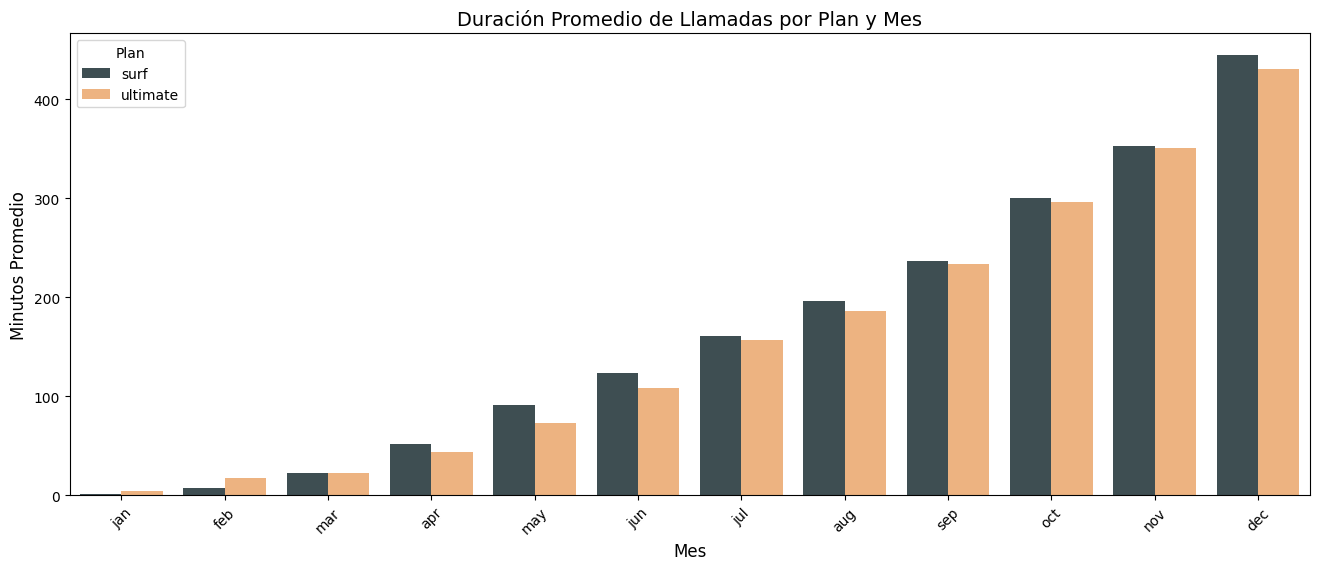

In [39]:
print(month_cols)
avg_minutes = data_complete_clean.groupby(['plan', 'month'])['minutes'].mean().reset_index()
#print(avg_minutes)
plt.figure(figsize=(16, 6))
sns.barplot(
    data = avg_minutes,
    x = 'month',
    y = 'minutes',
    hue = 'plan',
    palette = {'surf': '#3B5055', 'ultimate': '#FFB26F'},
    order = month_cols
)
plt.title('Duración Promedio de Llamadas por Plan y Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Minutos Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan', loc='upper left')

# Mostrar el gráfico
plt.show()

Promedio y Varianza Surf
436.80246113989637
52481.561082726934
/////////////////////////////////////////////
Promedio y Varianza Ultimate
435.2865168539326
56387.08516253417
/////////////////////////////////////////////


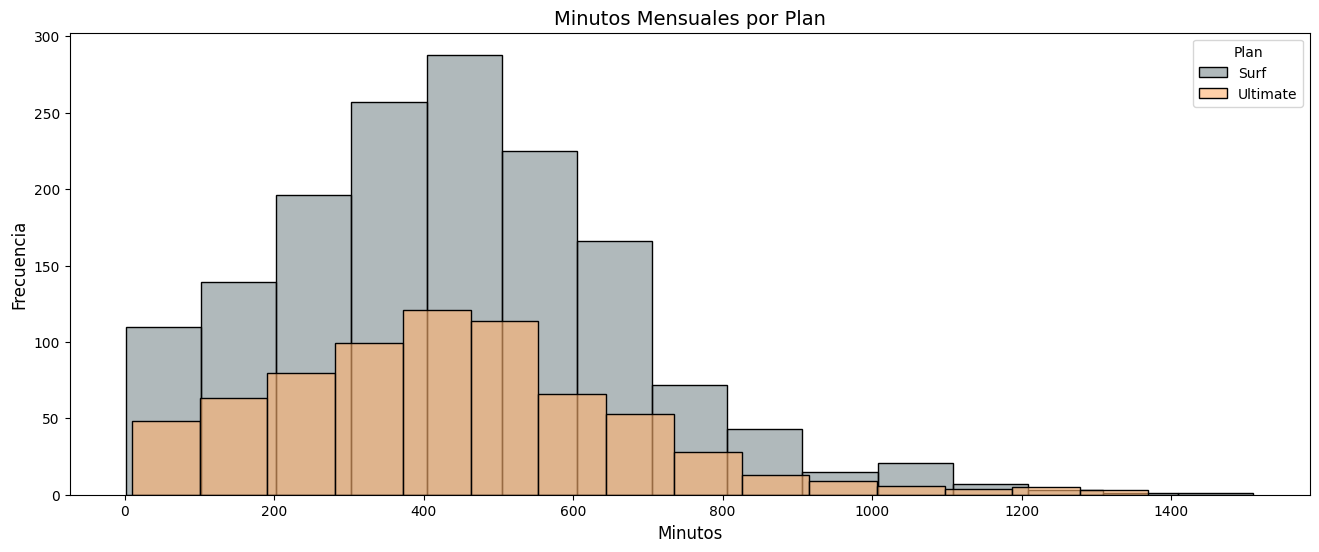

In [40]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_data = data_complete_clean[data_complete_clean['plan'] == 'surf']
surf_data = surf_data[surf_data['minutes'] > 0] # Eliminate 0,  son clientes inactivos
ultimate_data = data_complete_clean[data_complete_clean['plan'] == 'ultimate']
ultimate_data = ultimate_data[ultimate_data['minutes'] > 0] # Eliminate 0, son clientes inactivos
####revisar df
#print(surf_data)
#print(ultimate_data)
####
plt.figure(figsize=(16, 6))
sns.histplot( # Surf hist
    surf_data['minutes'],
    bins=15,
    color='#3B5055',
    alpha=0.4,
    label='Surf'
)

sns.histplot( # ultimate hist
    ultimate_data['minutes'],
    bins=15,
    color='#FFB26F',
    alpha=0.6,
    label='Ultimate',

)
plt.title('Minutos Mensuales por Plan', fontsize=14)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
# Mostrar mean and var
print('Promedio y Varianza Surf')
print(surf_data['minutes'].mean())
print(surf_data['minutes'].var())
print('/////////////////////////////////////////////')
print('Promedio y Varianza Ultimate')
print(ultimate_data['minutes'].mean())
print(ultimate_data['minutes'].var())   
print('/////////////////////////////////////////////')
# mostrar grafico
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [41]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#general
stats_by_month = data_complete_clean.groupby('month')['minutes'].agg(['mean', 'var']).reset_index()
stats_by_month['month'] = pd.Categorical(
    stats_by_month['month'],
    categories=month_cols,
    ordered=True
)
print('Promedio y Varianza General Duracion llamadas')
print(stats_by_month)
print('/////////////////////////////////////////////')
print()
mean_minutes = data_complete_clean.groupby('plan')['minutes'].mean() # obtener media de minutos
# Mean and Var Surf
surf_data = data_complete_clean[data_complete_clean['plan'] == 'surf']
surf_stats = surf_data.groupby('month')['minutes'].agg(['mean', 'var']).reset_index()
surf_stats.columns = ['month', 'mean', 'var']
surf_stats['month'] = pd.Categorical(
    surf_stats['month'],
    categories = month_cols,
    ordered = True
    )
print('Promedio y Varianza Surf Duracion llamadas')
print(surf_stats)
print('Promedio de minutos Surf')
surf_mean = mean_minutes.loc['surf']
print(surf_mean) # show mean
print('/////////////////////////////////////////////')
print()
# Mean and Var Ultimate
ultimate_data = data_complete_clean[data_complete_clean['plan'] == 'ultimate']
ultimate_stats = ultimate_data.groupby('month')['minutes'].agg(['mean', 'var']).reset_index()
ultimate_stats.columns = ['month', 'mean', 'var']
ultimate_stats['month'] = pd.Categorical(
    ultimate_stats['month'],
    categories = month_cols,
    ordered = True
    )
print('Promedio y Varianza Ultimate Duracion llamadas')
print(ultimate_stats)
print('Promedio de minutos Ultimate')
ultimate_mean = mean_minutes.loc['ultimate']
print(ultimate_mean) # show mean


Promedio y Varianza General Duracion llamadas
   month     mean           var
0    jan    2.360    591.104609
1    feb   10.990   5511.641182
2    mar   22.482   9684.242160
3    apr   49.302  21115.934665
4    may   85.098  38533.824044
5    jun  118.542  47730.300838
6    jul  159.290  68345.015932
7    aug  192.720  67718.161924
8    sep  235.972  71646.684585
9    oct  299.248  77278.792080
10   nov  352.682  71907.471820
11   dec  440.008  72077.931800
/////////////////////////////////////////////

Promedio y Varianza Surf Duracion llamadas
   month        mean           var
0    jan    1.197640    289.271474
1    feb    7.884956   3522.534063
2    mar   22.389381   9238.374561
3    apr   51.849558  22958.962507
4    may   90.761062  41547.922030
5    jun  123.410029  51058.384633
6    jul  160.613569  68272.853188
7    aug  195.982301  67975.674242
8    sep  237.050147  68730.580318
9    oct  300.430678  75462.660121
10   nov  353.395280  67842.724948
11   dec  444.483776  72761.

Mediana Surf
0.0


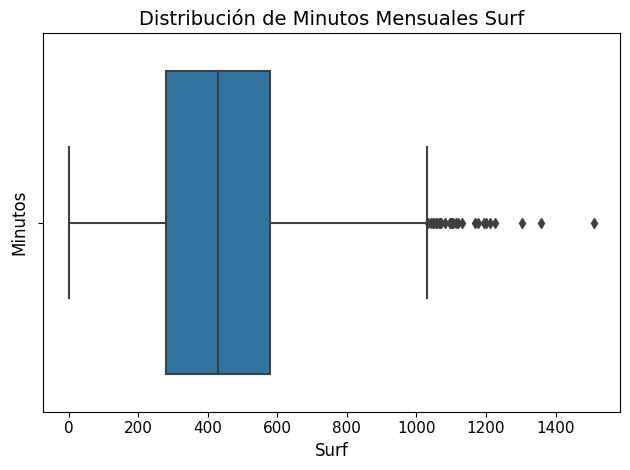

In [42]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# SURF
surf_data = surf_data[surf_data['minutes'] > 0]
dataset_surf = surf_data['minutes']
sns.boxplot(dataset_surf)
plt.title("Distribución de Minutos Mensuales Surf", fontsize=14)
plt.xlabel("Surf", fontsize=12)
plt.ylabel("Minutos", fontsize=12)
plt.xticks(fontsize=11)
plt.tight_layout()
median_minutes = data_complete_clean.groupby('plan')['minutes'].median()
print('Mediana Surf')
print(median_minutes.loc['surf'])



Mediana Ultimate
0.0


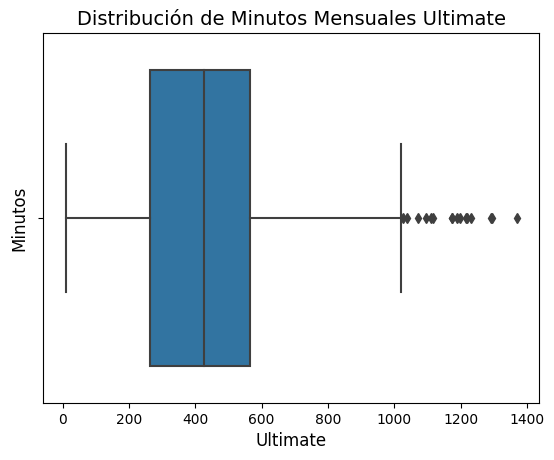

In [43]:
# ULTIMATE
ultimate_data = ultimate_data[ultimate_data['minutes'] > 0]
dataset_ultimate = ultimate_data['minutes']
sns.boxplot(dataset_ultimate)
plt.title("Distribución de Minutos Mensuales Ultimate", fontsize=14)
plt.xlabel("Ultimate", fontsize=12)
plt.ylabel("Minutos", fontsize=12)
print('Mediana Ultimate')
print(median_minutes.loc['ultimate'])

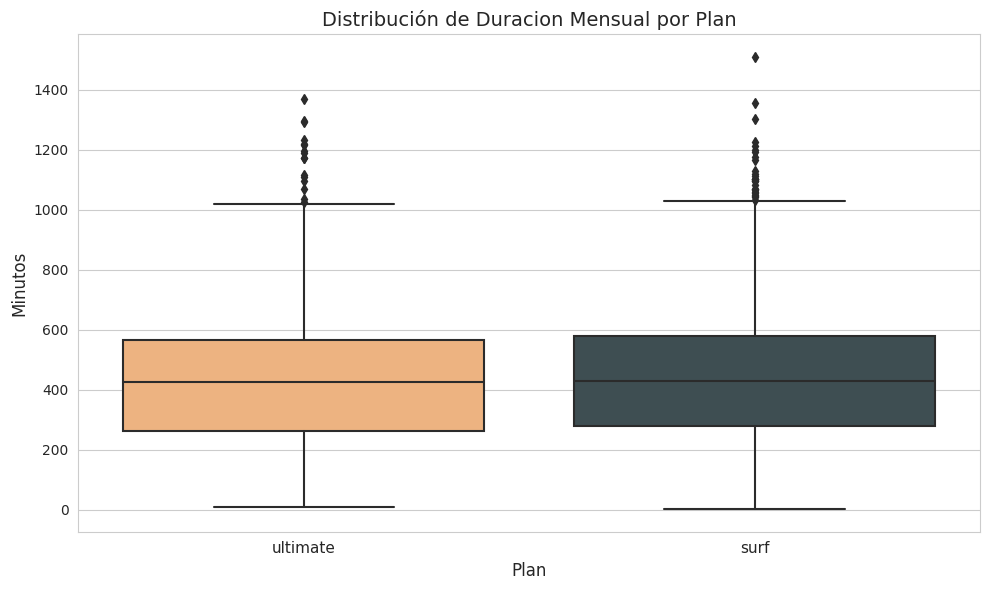

In [44]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crea diagrama de caja de ambos dataset
data_complete_clean = data_complete_clean[data_complete_clean['minutes'] > 0] # Eliminar 0 de clientes no activos

sns.boxplot(
    data=data_complete_clean,
    x="plan",
    y="minutes",
    palette={"surf": "#3B5055", "ultimate": "#FFB26F"},

)

plt.title("Distribución de Duracion Mensual por Plan", fontsize=14)
plt.xlabel("Plan", fontsize=12)
plt.ylabel("Minutos", fontsize=12)
plt.xticks(fontsize=11)
plt.tight_layout()

# Mostrar
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
1.   Los promedios de duracion de llamada de ambos planes son practicamente iguales.
2.    Sin embargo Surf tiene una varianza mas alta y tiene mas llamadas excepecionalmente largas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, revisar por cada grupo y plan deja gráficas mucho más completas de entender
</div>

### Mensajes

Promedio y Varianza Mensajes general por mes
   month       mean          var
0    jan  13.833333   238.966667
1    feb  16.466667   449.980952
2    mar  16.971429   441.734454
3    apr  18.774648   511.148491
4    may  26.538462   984.716953
5    jun  26.957447   904.341033
6    jul  28.938547   943.316427
7    aug  31.826087  1107.716347
8    sep  32.711191  1026.148171
9    oct  35.407738  1265.722806
10   nov  34.218905  1130.510564
11   dec  40.439130  1505.584522
/////////////////////////////////////////////

Promedio y Varianza Mensajes por Plan y Mes
   month      plan       mean          var
0    jan      surf  10.500000   220.500000
1    jan  ultimate  15.500000   313.666667
2    feb      surf  12.000000   386.000000
3    feb  ultimate  23.166667   552.566667
4    mar      surf  15.260870   346.565217
5    mar  ultimate  20.250000   654.386364
6    apr      surf  17.400000   501.591837
7    apr  ultimate  22.047619   544.147619
8    may      surf  24.386667   862.916036
9    

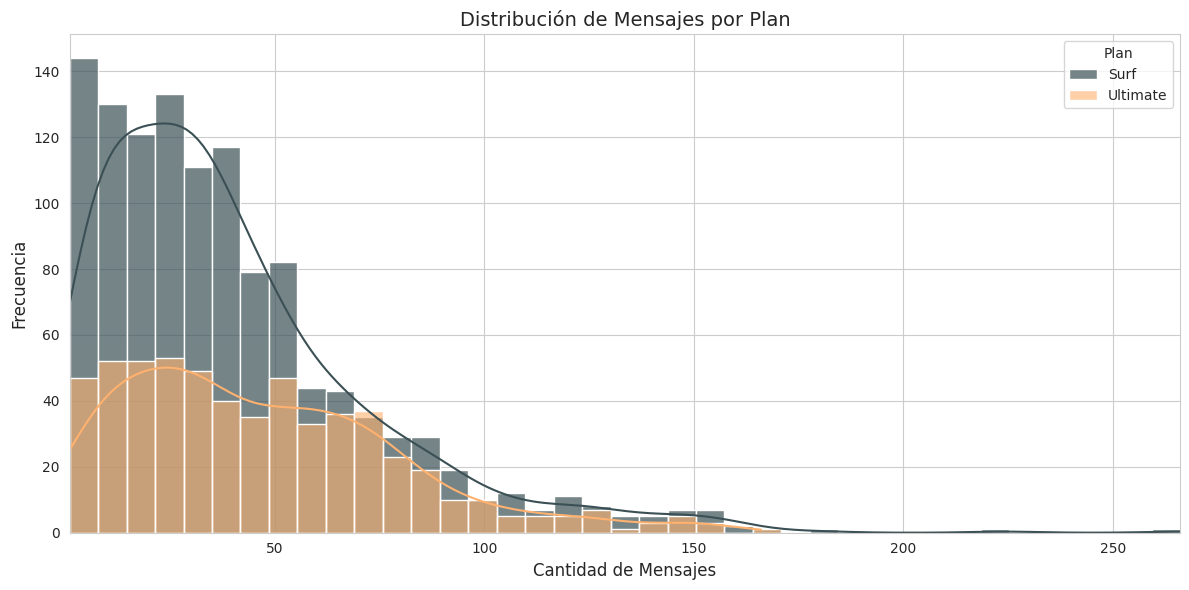

In [45]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Mean y Var
stats_messages = data_complete_clean.groupby('month')['messages'].agg(['mean', 'var']).reset_index()
stats_messages.columns = ['month', 'mean', 'var']
stats_messages['month'] = pd.Categorical(
    stats_messages['month'],
    categories=month_cols,
    ordered=True
)
stats_messages = stats_messages.sort_values('month')
print('Promedio y Varianza Mensajes general por mes')
print(stats_messages)
print('/////////////////////////////////////////////')
print()
stats_plan_month = data_complete_clean.groupby(['month', 'plan'])['messages'].agg(['mean', 'var']).reset_index()
print('Promedio y Varianza Mensajes por Plan y Mes')
print(stats_plan_month)
print('/////////////////////////////////////////////')
mean_messages = data_complete_clean.groupby('plan')['messages'].mean()
print('Promedio de mensajes Surf')
print(mean_messages.loc['surf'].round(2))
print('Promedio de mensajes Ultimate')
print(mean_messages.loc['ultimate'].round(2))
#######################################
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan HISTOGRAMA
surf_data = data_complete_clean[(data_complete_clean["plan"] == "surf") & (data_complete_clean["messages"] > 0)] # Excluir 0

ultimate_data = data_complete_clean[(data_complete_clean["plan"] == "ultimate") & (data_complete_clean["messages"] > 0)] # Excluir 0

# Calcular rango global (excluyendo 0)
global_min = min(surf_data['messages'].min(), ultimate_data['messages'].min())
global_max = max(surf_data['messages'].max(), ultimate_data['messages'].max())

# Definir bins uniformes
uniform_bins = np.linspace(global_min, global_max, 40)

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Histograma  Surf
sns.histplot(
    surf_data['messages'],
    bins=uniform_bins,
    color='#3B5055',
    alpha=0.7,
    label='Surf',
    kde=True
)

# Histograma  Ultimate
sns.histplot(
    ultimate_data['messages'],
    bins=uniform_bins,
    color='#FFB26F',
    alpha=0.6,
    label='Ultimate',
    kde=True
)

# Personalizar
plt.title('Distribución de Mensajes por Plan', fontsize=14)
plt.xlabel('Cantidad de Mensajes', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan')
plt.xlim(global_min, global_max)
plt.tight_layout()
##### Stats
stats_plan = data_complete_clean.groupby("plan")["messages"].agg(
    media_mensajes="mean",
    varianza_mensajes="var"
).reset_index()
print('Media y Var por plan')
print(stats_plan)
plt.show()

In [46]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
###NOTA CREO QUE ESTO VA EN LA SIGUIENTE SECCIÓN###


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

Media y Var de Uso de internet por mes y plan (GB)
   month      plan       mean         var
0    jan      surf   5.000000   18.000000
1    jan  ultimate   7.250000   14.916667
2    feb      surf  12.222222   41.444444
3    feb  ultimate  18.000000   41.200000
4    mar      surf  13.565217   63.984190
5    mar  ultimate  18.416667  138.628788
6    apr      surf  12.220000   56.215918
7    apr  ultimate  16.333333   85.833333
8    may      surf  14.373333   57.020901
9    may  ultimate  16.862069   54.194581
10   jun      surf  15.489583   48.252522
11   jun  ultimate  16.000000   64.045455
12   jul      surf  16.875000   61.992647
13   jul  ultimate  16.491525   64.254237
14   aug      surf  16.955975   71.763872
15   aug  ultimate  17.845070   58.047082
16   sep      surf  16.544503   47.459851
17   sep  ultimate  17.011628   47.258687
18   oct      surf  17.411255   59.173612
19   oct  ultimate  17.885714   52.082967
20   nov      surf  16.382671   51.092162
21   nov  ultimate  17.21

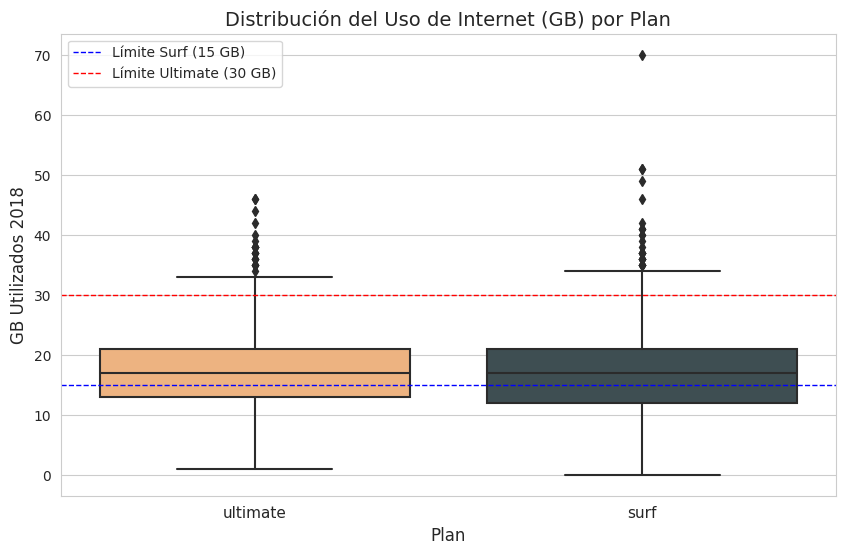

In [47]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear diagrama de caja
sns.boxplot(
    data=data_complete_clean,
    x="plan",
    y="gb",
    palette={"surf": "#3B5055", "ultimate": "#FFB26F"},
)

# Personalizar
plt.title("Distribución del Uso de Internet (GB) por Plan", fontsize=14)
plt.xlabel("Plan", fontsize=12)
plt.ylabel("GB Utilizados 2018", fontsize=12)
plt.xticks(fontsize=11)

# Límites de datos incluidos
plt.axhline(y=15, color='blue', linestyle='--', linewidth=1, label="Límite Surf (15 GB)")
plt.axhline(y=30, color='red', linestyle='--', linewidth=1, label="Límite Ultimate (30 GB)")
plt.legend()

# Mean y Var

stats_month_plan = data_complete_clean.groupby(['month', 'plan'])['gb'].agg(
    mean='mean',
    var='var'
).reset_index()

# Convertir 'month' a categórico para orden cronológico
stats_month_plan['month'] = pd.Categorical(
    stats_month_plan['month'],
    categories=month_cols,
    ordered=True
)

# Ordenar por mes y luego por plan
stats_month_plan = stats_month_plan.sort_values(['month', 'plan'])

# Reorganizar columnas (mes primero, plan después)
stats_month_plan = stats_month_plan[['month', 'plan', 'mean', 'var']]
print('Media y Var de Uso de internet por mes y plan (GB)')
print(stats_month_plan)
print('/////////////////////////////////////////////')
# Mean y Var por plan
stats_gb_plan = data_complete_clean.groupby("plan")["gb"].agg(
    media_gb="mean",
    varianza_gb="var"
).reset_index()
print('Media y Var por plan')
print(stats_gb_plan)
print()
# Mostrar el gráfico
plt.show()

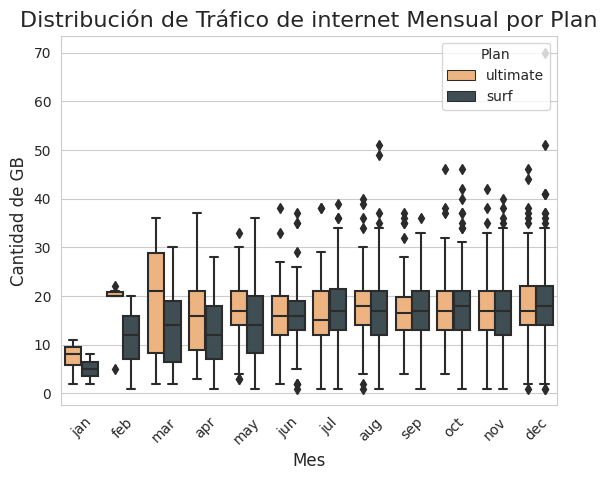

In [48]:
# COMPARACION POR MES
### REVISAR
data_complete_clean = data_complete_clean[data_complete_clean['gb'] > 0] # Eliminate 0, clientes inactivos
sns.boxplot(
    data=data_complete_clean,
    x="month",
    y="gb",
    hue="plan",
    palette={"surf": "#3B5055", "ultimate": "#FFB26F"},
    order = month_cols,

)

# Edicion
plt.title("Distribución de Tráfico de internet Mensual por Plan", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad de GB", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Plan", loc="upper right")


plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
1.  La media de uso del plan Surf (16.79) está por **encima** del limite del plan (15 gb) **11.9%**
2.  La media de uso del plan Ultimate (17.39) está muy por **debajo** del limite (30 gb) **42%**
3.  El plan Surf tiene un valor extraordinario sobre los 70gb
4.  Se usan mas GB en promedio en el plan Ultimate, pero se sobrepasa el limite del plan, mas en Surf.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [49]:
# Comparacion de ingresos totales por mes
#print(data_complete_clean) #revision de df
#print(data_complete_clean.info())

data_filtered = data_complete_clean[data_complete_clean["total_cost"] > 0] # Filtrado de clientes activos


# Calcular estadísticas mean y var
stats_total_cost = (
    data_filtered
    .groupby(['month', 'plan'])['total_cost']
    .agg(media_total='mean', varianza_total='var')
    .reset_index()
)

# Ordenar por mes y plan
stats_total_cost['month'] = pd.Categorical(
    stats_total_cost['month'],
    categories=month_cols,
    ordered=True
)
stats_total_cost = stats_total_cost.sort_values(['month', 'plan'])
print('Media y Var de Ingreso por mes y plan')
print(stats_total_cost.round(2)) # Redondeo a dos decimales
print('/////////////////////////////////////////////')
# Calcular estadísticas mean y var globales
stats_total_cost = (
    data_filtered
    .groupby(['plan'])['total_cost']
    .agg(media_global='mean', varianza_global='var')
    .reset_index()
)
print('Media y Var de Ingreso Global')
print(stats_total_cost.round(2))

Media y Var de Ingreso por mes y plan
   month      plan  media_total  varianza_total
0    jan      surf        20.00            0.00
1    jan  ultimate        70.00            0.00
2    feb      surf        34.40          428.28
3    feb  ultimate        70.00            0.00
4    mar      surf        45.94         1512.02
5    mar  ultimate        74.67          145.52
6    apr      surf        41.13         1214.82
7    apr  ultimate        73.00          120.40
8    may      surf        48.75         2015.78
9    may  ultimate        70.72           15.21
10   jun      surf        50.16         2027.21
11   jun  ultimate        71.71           78.30
12   jul      surf        63.19         2975.73
13   jul  ultimate        71.90          104.47
14   aug      surf        65.20         3663.55
15   aug  ultimate        72.86          154.81
16   sep      surf        57.32         2099.87
17   sep  ultimate        72.03           75.94
18   oct      surf        65.57         3163.70
19

Total de ingreso del plan Surf: $92542.09
Total de ingreso del plan Ultimate: $51464.00
Media y Var de Ingreso Global
       plan  media_global  varianza_global
0      surf         60.52          2880.38
1  ultimate         72.28           129.04


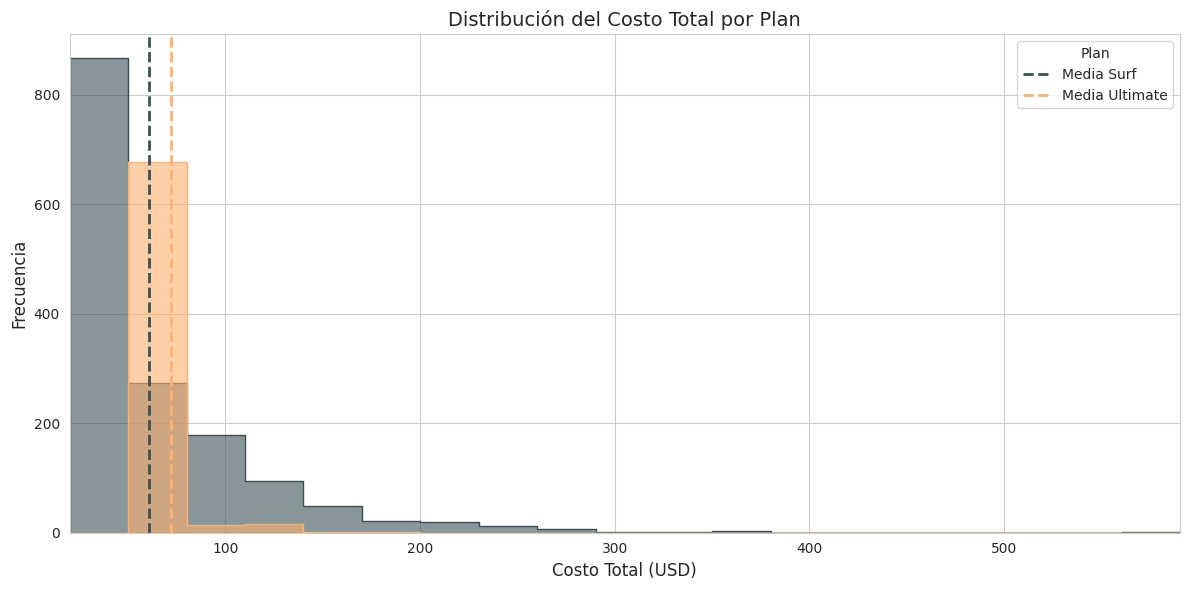

In [50]:
# Histograma de distribucion de costo total por plan

# Filtrar clientes activos
data_filtered = data_complete_clean[data_complete_clean["total_cost"] > 0]

# Calcular la media de cada plan
mean_surf = data_filtered[data_filtered["plan"] == "surf"]["total_cost"].mean()
mean_ultimate = data_filtered[data_filtered["plan"] == "ultimate"]["total_cost"].mean()
# Calcular el total de ingreso de cada plan
total_cost_surf = data_filtered[data_filtered["plan"] == "surf"]["total_cost"].sum()
total_cost_ultimate = data_filtered[data_filtered["plan"] == "ultimate"]["total_cost"].sum()
print(f"Total de ingreso del plan Surf: ${total_cost_surf:.2f}")
print(f"Total de ingreso del plan Ultimate: ${total_cost_ultimate:.2f}")
# Bins consistentes
global_min = data_filtered["total_cost"].min()
global_max = data_filtered["total_cost"].max()
uniform_bins = np.linspace(global_min, global_max, 20)

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Histograma combinado
hist = sns.histplot(
    data=data_filtered,
    x="total_cost",
    hue="plan",
    bins=uniform_bins,
    palette={"surf": "#3B5055", "ultimate": "#FFB26F"},
    alpha=0.6,
    element="step"
)

# Añadir lineas verticales para las medias
plt.axvline(mean_surf, color="#3B5055", linestyle="--", linewidth=2, label="Media Surf")
plt.axvline(mean_ultimate, color="#FFB26F", linestyle="--", linewidth=2, label="Media Ultimate")

# Personalización
plt.title("Distribución del Costo Total por Plan", fontsize=14)
plt.xlabel("Costo Total (USD)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xlim(global_min, global_max)

# Combinar leyendas (histograma y lineas)
handles, labels = hist.get_legend_handles_labels()
plt.legend(handles=handles + hist.get_lines()[:2],
           labels=labels,
           title="Plan")
print('Media y Var de Ingreso Global')
print(stats_total_cost.round(2))
plt.tight_layout()
plt.show()

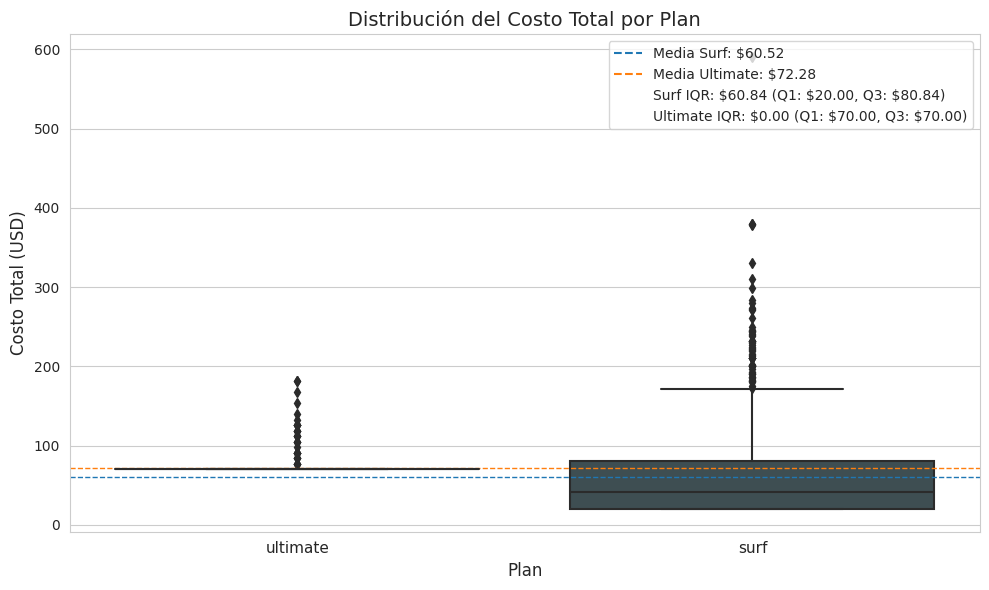

In [51]:
# distribucion del costo box

# Filtrar valores de clientes activos
data_filtered = data_complete_clean[data_complete_clean["total_cost"] > 0]

# Calcular Q1, Q3 e IQR para cada plan
iqr_data = (
    data_filtered
    .groupby("plan")["total_cost"]
    .agg(
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        IQR=lambda x: x.quantile(0.75) - x.quantile(0.25)
    )
    .reset_index()
)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear diagrama de caja
sns.boxplot(
    data=data_filtered,
    x="plan",
    y="total_cost",
    palette={"surf": "#3B5055", "ultimate": "#FFB26F"},
    showfliers=True
)

# Personalización
plt.title("Distribución del Costo Total por Plan", fontsize=14)
plt.xlabel("Plan", fontsize=12)
plt.ylabel("Costo Total (USD)", fontsize=12)
plt.xticks(fontsize=11)

# Añadir líneas horizontales para las medias y leyendas del IQR
mean_surf = data_filtered[data_filtered["plan"] == "surf"]["total_cost"].mean()
mean_ultimate = data_filtered[data_filtered["plan"] == "ultimate"]["total_cost"].mean()

# Crear textos para la leyenda
legend_labels = [
    f"Media Surf: ${mean_surf:.2f}",
    f"Media Ultimate: ${mean_ultimate:.2f}",
    f"Surf IQR: ${iqr_data[iqr_data['plan'] == 'surf']['IQR'].values[0]:.2f} (Q1: ${iqr_data[iqr_data['plan'] == 'surf']['Q1'].values[0]:.2f}, Q3: ${iqr_data[iqr_data['plan'] == 'surf']['Q3'].values[0]:.2f})",
    f"Ultimate IQR: ${iqr_data[iqr_data['plan'] == 'ultimate']['IQR'].values[0]:.2f} (Q1: ${iqr_data[iqr_data['plan'] == 'ultimate']['Q1'].values[0]:.2f}, Q3: ${iqr_data[iqr_data['plan'] == 'ultimate']['Q3'].values[0]:.2f})"
]

# Añadir líneas y leyendas
plt.axhline(mean_surf, color="#1f77b4", linestyle="--", linewidth=1)
plt.axhline(mean_ultimate, color="#ff7f0e", linestyle="--", linewidth=1)
plt.legend(handles=[
    plt.Line2D([], [], color="#1f77b4", linestyle="--", label=legend_labels[0]),
    plt.Line2D([], [], color="#ff7f0e", linestyle="--", label=legend_labels[1]),
    plt.Line2D([], [], color="gray", linestyle="None", label=legend_labels[2]),
    plt.Line2D([], [], color="gray", linestyle="None", label=legend_labels[3]),
], loc="upper right")

plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
1. La media de pago del Plan **Surf** , es de 60.52 usd, que es 40.52 usd más que el precio de listado (20.00 usd), es decir ligeramente mas del 300% del valor original.  
2. La media de pago del Plan **Ultimate** , es de 72.28 usd que es 2.28 usd más que el precio de listado (70.00 usd), es decir 3.25% mas del valor original.  
3. La varianza de pagos del plan Surf es muy alta y muestra muchos valores fuera del rango intercuartílico.  
4. La varianza de pagos del plan Ultimate es mas baja, con baja dispersion en el IQR y con pocos valores fuera del rango intercuartílico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, trabajaste muy bien las gráficas y redactaste su respectiva conclusión de cada sección dejando así un proceso de análisis mucho más sencillo de seguir
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [52]:
# Prueba las hipótesis
#print(data_complete_clean)
#print(data_complete_clean.info())
print("H₀: Hay diferencia significativa en costos promedio.")
print("H₁: NO hay diferencia significativa en costos promedio.")
# Filter data
surf_total = data_complete_clean[(data_complete_clean['plan'] == 'surf') & (data_complete_clean['total_cost'] > 0)]['total_cost']

ultimate_total = data_complete_clean[(data_complete_clean['plan'] == 'ultimate') & (data_complete_clean['total_cost'] > 0)]['total_cost']

# Perform t-test
t_stat, p_value = st.ttest_ind(surf_total, ultimate_total)

# Results with alpha = 0.05
print(f"t-statistic: {t_stat:.6f}")
print(f"p-value: {p_value:.8f}")
alpha = 0.05
if p_value < alpha:
    print("Rechazar H₁. Hay diferencia significativa en costos promedio. p_value < alpha.")
else:
    print("No hay evidencia para rechazar H₀. p_value > alpha.")


H₀: Hay diferencia significativa en costos promedio.
H₁: NO hay diferencia significativa en costos promedio.
t-statistic: -5.784351
p-value: 0.00000001
Rechazar H₁. Hay diferencia significativa en costos promedio. p_value < alpha.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
# El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.
print("H₀: Hay diferencia significativa en costos promedio de los usuarios del área NY-NJ respecto a los usuarios de las demás ciudades.")
print("H₁: NO hay diferencia significativa en costos promedio entre los usuarios del área NY-NJ respecto a los usuarios de las demás ciudades.")
# Grupo A: NY/NJ users
ny_nj_users = dt_megaline_users[
    dt_megaline_users['city'].str.contains(r'\b(NY|NJ)\b', regex=True)
][['user_id']]

# Grupo B: Other cities users
other_users = dt_megaline_users[
    ~dt_megaline_users['city'].str.contains(r'\b(NY|NJ)\b', regex=True)
][['user_id']]

# Merge data_complete_clean to get total costs
group_a = pd.merge(ny_nj_users,
                 data_complete_clean[['user_id', 'total_cost']],
                 on='user_id',
                 how='inner')

# Merge data_complete_clean to get total costs
group_b = pd.merge(other_users,
                 data_complete_clean[['user_id', 'total_cost']],
                 on='user_id',
                 how='inner')

# TTESt
t_stat, p_value = st.ttest_ind(group_a['total_cost'], group_b['total_cost'])

print(f"P-value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Rechazar H₁. Diferencia significatia (p < 0.05)")
else:
    print("\nConclusion: No hay evidencia para rechazar H₀. No hay diferencia significativa (p ≥ 0.05)")



H₀: Hay diferencia significativa en costos promedio de los usuarios del área NY-NJ respecto a los usuarios de las demás ciudades.
H₁: NO hay diferencia significativa en costos promedio entre los usuarios del área NY-NJ respecto a los usuarios de las demás ciudades.
P-value: 0.04344

Conclusion: Rechazar H₁. Diferencia significativa (p < 0.05)


/.venv/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, se aplicaron las pruebas estadísticas de manera adecuada. Este es un paso importante para cuando quieras comprobar que las diferencias observadas son reales y no sólo causa de ruido en los datos, con esto tienes una comprobación matemática de esto
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

# Llamadas:
*   Los promedios de minutos de llamadas en **Surf** y **Ultimate** son similares (437.99 y 435.28 respectivamente). 
*   Ambos promedios están por debajo del limite del plan. Surf **62 min** y **Ultimate 564.72 min**.
* Las distribuciones de ambos datasets son sesgados hacia la derecha. 
* Surf tiene mas valores fuera del rango intercuartílico.


# Mensajes:
*   Los promedios de mensajes en **Surf** y **Ultimate** son similares (30.48 y 37.78 respectivamente)
*   Ambos promedios están por debajo del limite del plan. Surf **19.52 mensajes** y **Ultimate 962.22 mensajes**. 
*   Las distribuciones de ambos datasets son sesgados hacia la derecha.
*   El plan Ultimate tiene una media de mensajes enviados ligeramente mas alta a la de Surf (23% más) y una varianza mas amplia.
*   En general se usan mas mensajes en el plan Ultimate con respecto al Surf.

# Internet:
*   Los promedios de GB usados en **Surf** y **Ultimate** son 16.79 y 17.39 respectivamente.
*   Solo el promedio de GB usados del plan **Surf**, estan por encima del limite del plan, 1.79 GB por encima.
*   El promedio de uso de GB de Ultimate esta muy por debajo del limite del plan, 12.61 GB por debajo.
*   Hay mas valores excepecionales de uso de GB en el plan **Surf** con respecto al **ultimate**. 
*  Se usan mas GB en promedio en el plan **Ultimate**, pero se sobrepasa mas el limite del plan, en **Surf**.

# Ingreso:
*   El total de ingresos del plan **Surf** es de 92,542.09 USD (79% mas con respecto a Ultimate)
*   El total de ingresos del plan **Ultimate** es de $51,464.00 USD
*   Los promedios de ingreso en **Surf** y **Ultimate** son 60.52  y 72.28 respectivamente.
*   Se cobra *mas* por encima del precio inicial del plan **Surf** (40.52 más) es decir ligeramente mas del 300% del valor original; que en el plan **Ultimate** ( solamente 2.28 por encima del precio inicial del plan) es decir 3.25% mas del valor original. 
*   Se intuye que la varianza amplia de los usos de GB en el plan **Surf** provocan una varianza amplia en el ingreso del plan **Surf**.
*   La distrubucion IQR de los ingresos del plan **Ultimate** es mas cerrada en comparacion a la del plan **Surf**. 